In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Cell 2: Generate Data (with separable classes)
np.random.seed(42)

# Dogs - higher whisker length
dogs_whisker_length = np.random.normal(loc=7, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

# Cats - lower whisker length  
cats_whisker_length = np.random.normal(loc=4, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [65]:
# Cell 3: Prepare and Split Data (16 train, 4 test)
X_dogs = np.column_stack((dogs_whisker_length, dogs_ear_flappiness_index))
X_cats = np.column_stack((cats_whisker_length, cats_ear_flappiness_index))

# Shuffle
np.random.shuffle(X_dogs)
np.random.shuffle(X_cats)

# Split: 8 from each class for training, 2 for testing
X_dogs_train, X_dogs_test = X_dogs[:8], X_dogs[8:]
X_cats_train, X_cats_test = X_cats[:8], X_cats[8:]

print(f"Training: {len(X_dogs_train)} dogs + {len(X_cats_train)} cats = 16 total")
print(f"Testing:  {len(X_dogs_test)} dogs + {len(X_cats_test)} cats = 4 total")

Training: 8 dogs + 8 cats = 16 total
Testing:  2 dogs + 2 cats = 4 total


In [66]:
# Cell 4: Define compute_error function
def compute_error(data_dogs, data_cats, theta, theta_0):
    """
    Compute classification error.
    Dogs should be positive (> 0), Cats should be negative (< 0)
    """
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta_0 < 0:  # Misclassified dog
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta_0 > 0:  # Misclassified cat
            error += 1
    return error

In [68]:
# Cell 5: Define random_linear_classifier function
def random_linear_classifier(data_dogs, data_cats, k, d):
    """
    Find best linear classifier by random search.
    
    Args:
        data_dogs: Dog data points (n_dogs, d)
        data_cats: Cat data points (n_cats, d)
        k: Number of random iterations
        d: Number of features
    
    Returns:
        best_theta, best_theta0
    """
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
    
    for i in range(k):
        theta = np.random.normal(size=d)
        theta_0 = np.random.normal()
        
        error = compute_error(data_dogs, data_cats, theta, theta_0)
        
        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta_0
    
    print(f"Best training error: {best_error} / {len(data_dogs) + len(data_cats)}")
    return best_theta, best_theta0

In [69]:
# Cell 6: Train the classifier
k = 1000  # Number of iterations (increased for better results)
d = 2     # Number of features

best_theta, best_theta0 = random_linear_classifier(X_dogs_train, X_cats_train, k, d)
print(f"Best theta: {best_theta}")
print(f"Best theta0: {best_theta0}")

Best training error: 0 / 16
Best theta: [ 1.06948089 -0.93376284]
Best theta0: 0.7842081876539384


In [70]:
# Cell 7: Evaluate on test data
train_error = compute_error(X_dogs_train, X_cats_train, best_theta, best_theta0)
test_error = compute_error(X_dogs_test, X_cats_test, best_theta, best_theta0)

print(f"Training error: {train_error} / 16")
print(f"Test error: {test_error} / 4")

Training error: 0 / 16
Test error: 0 / 4


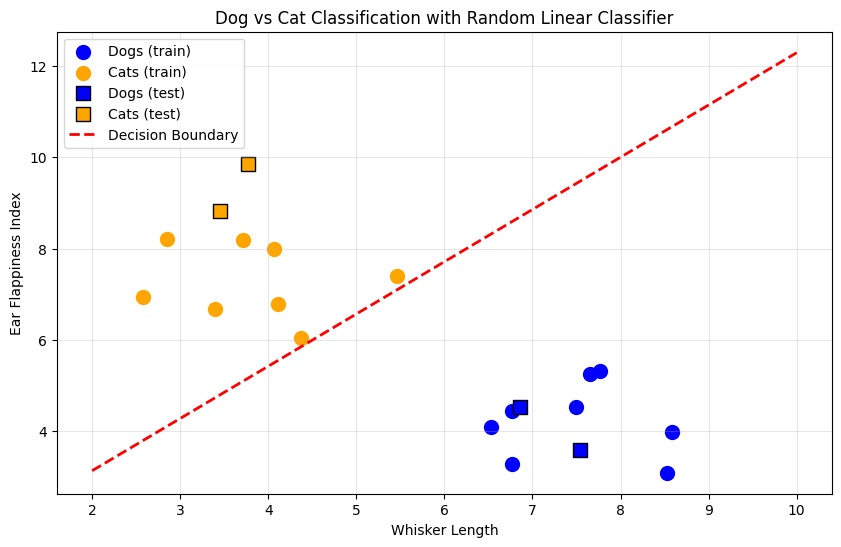

In [71]:
# Cell 8: Plot results
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_dogs_train[:, 0], X_dogs_train[:, 1], c='blue', marker='o', label='Dogs (train)', s=100)
plt.scatter(X_cats_train[:, 0], X_cats_train[:, 1], c='orange', marker='o', label='Cats (train)', s=100)

# Plot test data (with different marker)
plt.scatter(X_dogs_test[:, 0], X_dogs_test[:, 1], c='blue', marker='s', label='Dogs (test)', s=100, edgecolors='black')
plt.scatter(X_cats_test[:, 0], X_cats_test[:, 1], c='orange', marker='s', label='Cats (test)', s=100, edgecolors='black')

# Plot decision boundary
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0] * x_vals - best_theta0) / best_theta[1]
plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=2, label='Decision Boundary')

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()